In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

# Load dataset
file_path = "D:/March-2025/project/own/msd/data.csv"  # Adjusted for the execution environment
df = pd.read_csv(file_path)

# Handle missing values
df = df.dropna()

# Define features and target variable
X = df[['WaistCirc', 'BMI', 'BloodGlucose', 'HDL', 'Triglycerides']]
y = df['MetabolicSyndrome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Ensure directory exists
os.makedirs(r'D:/March-2025/project/own/msd/models', exist_ok=True)

# Save model
with open(r'D:/March-2025/project/own/msd/random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save scaler
with open(r'D:/March-2025/project/own/msd/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Return evaluation metrics and confusion matrix
accuracy, classification_rep, conf_matrix


(0.8374792703150912,
 '              precision    recall  f1-score   support\n\n           0       0.88      0.87      0.87       387\n           1       0.77      0.78      0.77       216\n\n    accuracy                           0.84       603\n   macro avg       0.82      0.82      0.82       603\nweighted avg       0.84      0.84      0.84       603\n',
 array([[337,  50],
        [ 48, 168]], dtype=int64))

C:\Program Files\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7134 - loss: 0.5984 - val_accuracy: 0.7330 - val_loss: 0.5169
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7506 - loss: 0.5198 - val_accuracy: 0.7430 - val_loss: 0.5094
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7598 - loss: 0.4794 - val_accuracy: 0.7413 - val_loss: 0.5086
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7555 - loss: 0.5017 - val_accuracy: 0.7330 - val_loss: 0.5069
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7798 - loss: 0.4694 - val_accuracy: 0.7463 - val_loss: 0.5119
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7517 - loss: 0.4897 - val_accuracy: 0.7297 - val_loss: 0.5048
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7591 - loss: 0.4964 - val_accuracy: 0.7347 - val_loss: 0.5043
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7732 - loss: 0.4741 - val_accuracy: 0.7512 - val_los

Model: Random Forest
Accuracy: 0.8375
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       387
           1       0.77      0.78      0.77       216

    accuracy                           0.84       603
   macro avg       0.82      0.82      0.82       603
weighted avg       0.84      0.84      0.84       603

Confusion Matrix:
 [[337  50]
 [ 48 168]]
--------------------------------------------------
Model: Gradient Boosting
Accuracy: 0.8474
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       387
           1       0.78      0.80      0.79       216

    accuracy                           0.85       603
   macro avg       0.83      0.84      0.84       603
weighted avg       0.85      0.85      0.85       603

Confusion Matrix:
 [[338  49]
 [ 43 173]]
--------------------------------------------------
Model: Logistic Regression
Accur

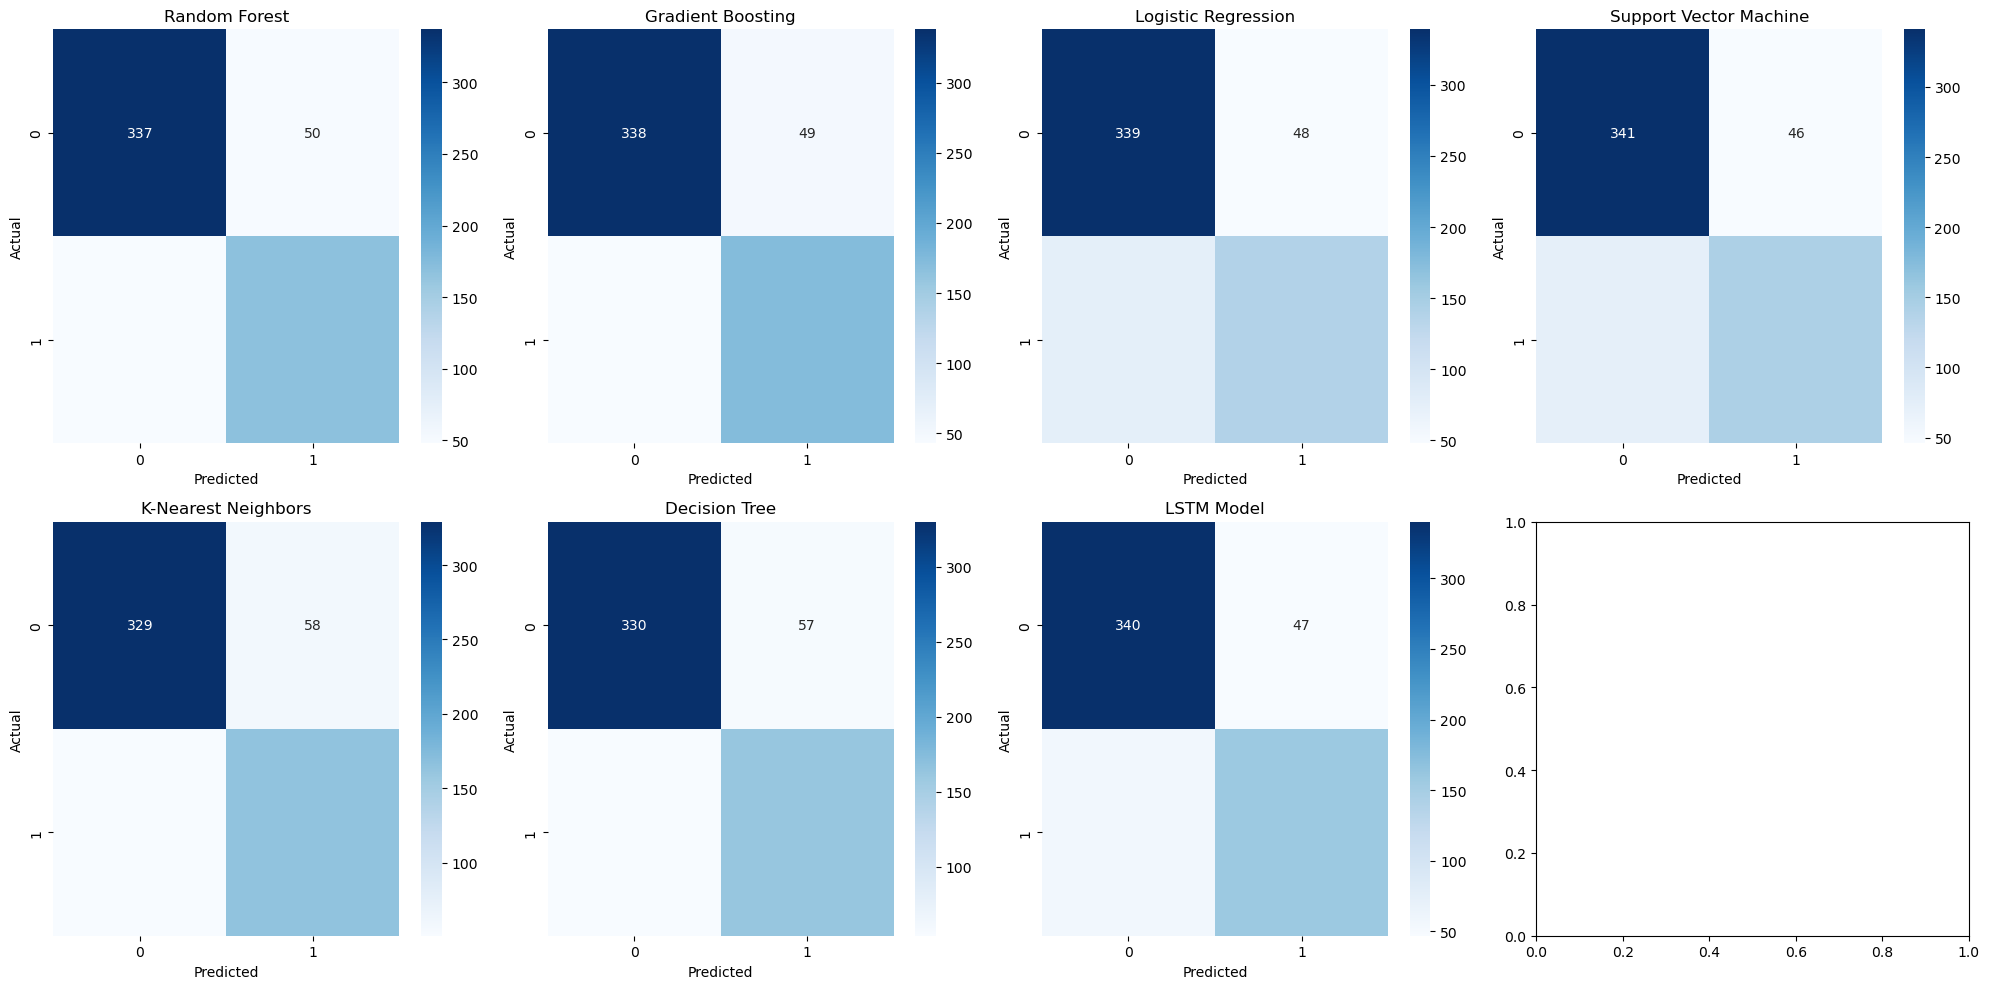

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Load dataset
file_path = "D:/March-2025/project/own/msd/data.csv"
df = pd.read_csv(file_path)

df = df.dropna()

# Define features and target variable
X = df[['WaistCirc', 'BMI', 'BloodGlucose', 'HDL', 'Triglycerides']]
y = df['MetabolicSyndrome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to train
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train and evaluate ML models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    results[name] = (accuracy, classification_rep, conf_matrix)
    
    # Save the trained model
    os.makedirs("D:/March-2025/project/own/msd/models", exist_ok=True)
    with open(f"D:/March-2025/project/own/msd/models/{name.replace(' ', '_')}.pkl", 'wb') as model_file:
        pickle.dump(model, model_file)

# LSTM Model
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, validation_data=(X_test_lstm, y_test))

# Evaluate LSTM
lstm_pred = (lstm_model.predict(X_test_lstm) > 0.5).astype(int)
lstm_accuracy = accuracy_score(y_test, lstm_pred)
lstm_classification_report = classification_report(y_test, lstm_pred)
lstm_conf_matrix = confusion_matrix(y_test, lstm_pred)

results["LSTM Model"] = (lstm_accuracy, lstm_classification_report, lstm_conf_matrix)

# Save LSTM model
lstm_model.save("D:/March-2025/project/own/msd/models/lstm_model.h5")

# Save scaler
with open("D:/March-2025/project/own/msd/models/scaler.pkl", 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Print results
for model_name, (acc, report, cm) in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", cm)
    print("-" * 50)

# Visualize confusion matrices
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, (model_name, (_, _, cm)) in enumerate(results.items()):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(model_name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()
